### To check:
- \# chirping vs non-chirping
- numbers I put in to the text and making sure they're consistent (percentages, sampling number, etc.)
- ticks on plots
- text that's been moved around

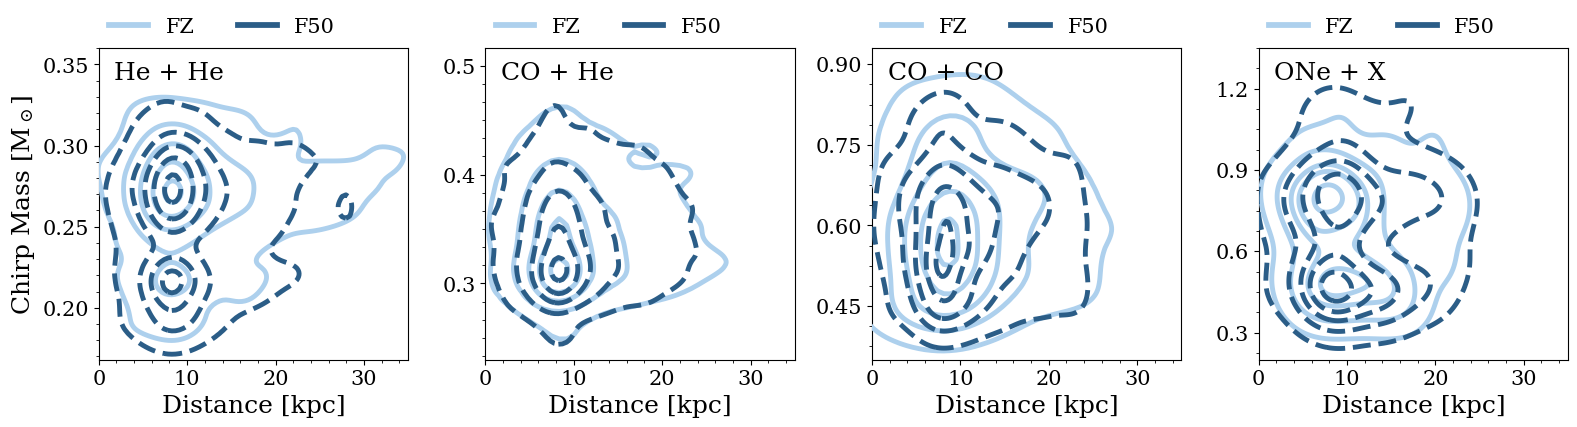

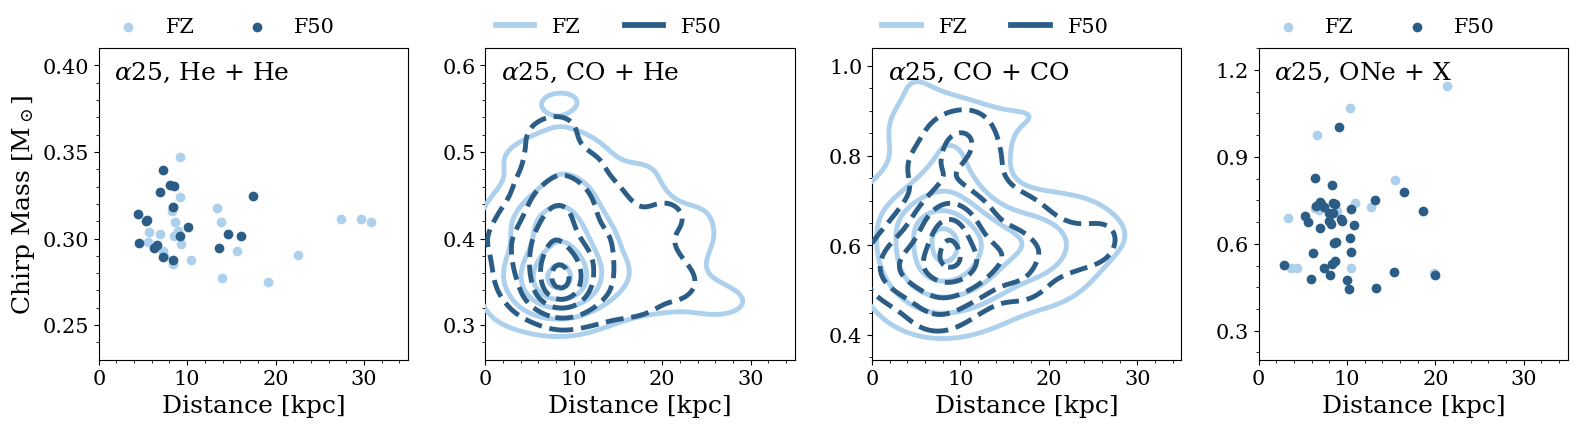

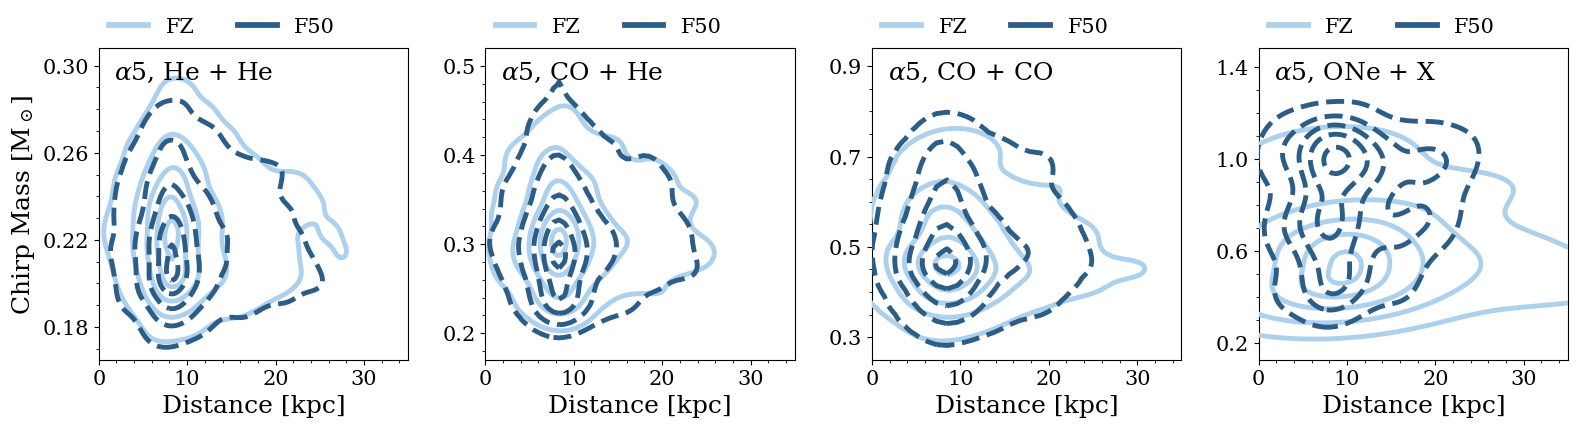

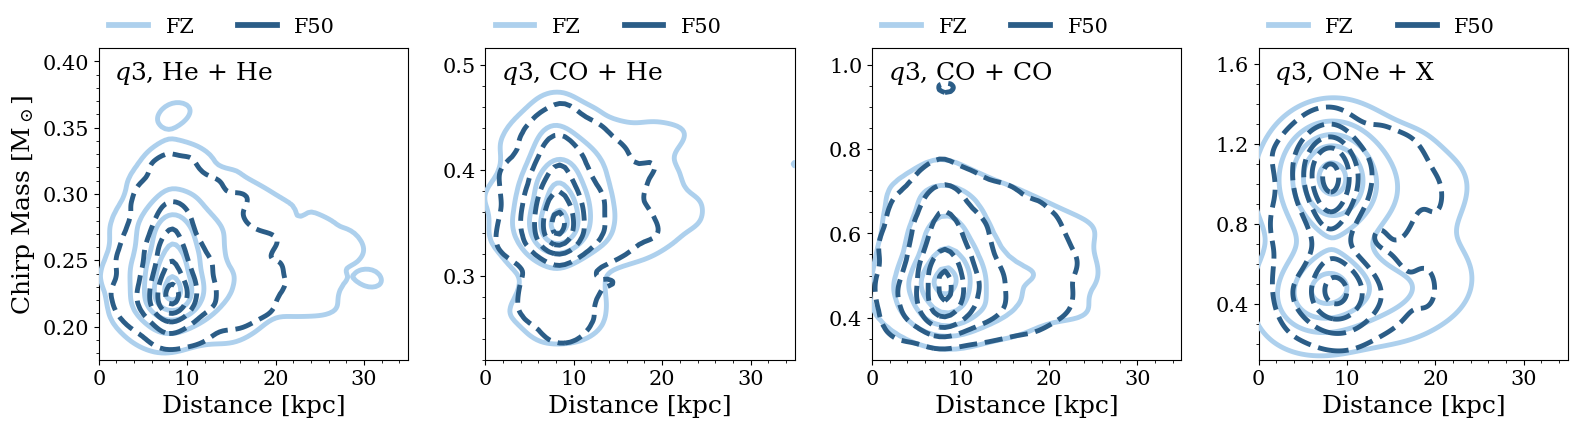

In [586]:
from matplotlib.ticker import AutoMinorLocator
import legwork.utils as utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import seaborn as sns
import paths
from matplotlib import patches

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["font.size"] = 14

models = ["fiducial", "alpha25", "alpha5", "q3"]
model_Zs = ["fiducial_Z", "alpha25_Z", "alpha5_Z", "q3_Z"]
model_labels = ["fiducial", r"$\alpha25$", r"$\alpha5$", r"$q3$"]
levels = [0.05, 0.25, 0.50, 0.75, 0.95]
#levels=5
label_y = [0.35, 0.49, 0.95, 1.6]
colors = ['#add0ed', '#2b5d87', '#4288c2', '#17334a']
figlabels = ['He + He', 'CO + He', 'CO + CO', 'ONe + X']

for model, model_Z, model_label in zip(models, model_Zs, model_labels):  
    fig, ax = plt.subplots(1, 4, figsize=(16,4.5))

    resolved_dat_FZ = pd.read_hdf(
       paths.data / "results.hdf", key="resolved_DWDs_{}_{}".format("FZ", model_Z)

    )
    resolved_dat_FZ = resolved_dat_FZ.loc[resolved_dat_FZ.resolved_chirp == 1.0]
    resolved_dat_F50 = pd.read_hdf(
        paths.data / "results.hdf", key="resolved_DWDs_{}_{}".format("F50", model)
    )
    resolved_dat_F50 = resolved_dat_F50.loc[resolved_dat_F50.resolved_chirp == 1.0]

    Heplot = resolved_dat_FZ.loc[
        (resolved_dat_FZ.kstar_1 == 10) & (resolved_dat_FZ.kstar_2 == 10)
    ]
    COHeplot = resolved_dat_FZ.loc[
        ((resolved_dat_FZ.kstar_1 == 11) & (resolved_dat_FZ.kstar_2 == 10)) |
        ((resolved_dat_FZ.kstar_2 == 11) & (resolved_dat_FZ.kstar_1 == 10))
    ]
    COplot = resolved_dat_FZ.loc[
        (resolved_dat_FZ.kstar_1 == 11) & (resolved_dat_FZ.kstar_2 == 11)
    ]
    ONeplot = resolved_dat_FZ.loc[
        ((resolved_dat_FZ.kstar_1 == 12) & (resolved_dat_FZ.kstar_2.isin([10, 11, 12]))) |
        ((resolved_dat_FZ.kstar_2 == 12) & (resolved_dat_FZ.kstar_1.isin([10, 11, 12])))
    ]


    Heplot_F50 = resolved_dat_F50.loc[
        (resolved_dat_F50.kstar_1 == 10) & (resolved_dat_F50.kstar_2 == 10)
    ]
    COHeplot_F50 = resolved_dat_F50.loc[
        ((resolved_dat_F50.kstar_1 == 11) & (resolved_dat_F50.kstar_2 == 10)) |
        ((resolved_dat_F50.kstar_2 == 11) & (resolved_dat_F50.kstar_1 == 10))
    ]
    COplot_F50 = resolved_dat_F50.loc[
        (resolved_dat_F50.kstar_1 == 11) & (resolved_dat_F50.kstar_2 == 11)
    ]
    ONeplot_F50 = resolved_dat_F50.loc[
        ((resolved_dat_F50.kstar_1 == 12) & (resolved_dat_F50.kstar_2.isin([10, 11, 12]))) |
        ((resolved_dat_F50.kstar_2 == 12) & (resolved_dat_F50.kstar_1.isin([10, 11, 12])))
    ]

    dists = [x.dist_sun.values for x in [Heplot, COHeplot, COplot, ONeplot]]
    dists_F50 = [
        x.dist_sun.values for x in [Heplot_F50, COHeplot_F50, COplot_F50, ONeplot_F50]
    ]
    M_c = [
        utils.chirp_mass(x.mass_1.values * u.M_sun, x.mass_2.values * u.M_sun).value
        for x in [Heplot, COHeplot, COplot, ONeplot]
    ]
    M_c_F50 = [
        utils.chirp_mass(x.mass_1.values * u.M_sun, x.mass_2.values * u.M_sun).value
        for x in [Heplot_F50, COHeplot_F50, COplot_F50, ONeplot_F50]
    ]

    for dist, Mc, dist_F50, Mc_F50, jj in zip(dists, M_c, dists_F50, M_c_F50, range(len(dists))):
        if ("alpha25" in model) & (jj in [0, 3]):
            ax[jj].scatter(dist, Mc, color=colors[0], label='FZ') 
            ax[jj].scatter(dist_F50, Mc_F50, color=colors[1], label='F50')
            ax[jj].legend(loc=(0, 1.01),
                          prop={'size': 15},
                          ncol=2,
                          frameon=False)

        else:

            sns.kdeplot(
                x=dist, 
                y=Mc, 
                fill=False, 
                ax=ax[jj], 
                color=colors[0], 
                zorder=3, 
                linewidths=3.5, 
                label='FZ', 
                levels=levels
            )
            sns.kdeplot(
                x=dist_F50, 
                y=Mc_F50, 
                fill=False, 
                ax=ax[jj], 
                color=colors[1], 
                zorder=6,
                linewidths=3.5, 
                linestyles='--', 
                label='F50', 
                levels=levels 
            )
            labels=["FZ", "F50"]
            handles = [patches.Patch(color=color, label=label, ls='-', lw=2) for color, label in zip(colors, labels)]
            leg = ax[jj].legend(handles=handles,
                                labels=labels,
                                loc=(0, 1.01),
                                prop={'size': 15},
                                ncol=2,
                                frameon=False)
            for patch in leg.get_patches():
                patch.set_height(2)
                patch.set_y(5)


    ax[0].set_ylabel('Chirp Mass [M$_\odot$]', fontsize=18)
    for i, name in zip(range(4), figlabels):
        ax[i].set_xlabel(r'Distance [kpc]', fontsize=18)
        if "fiducial" not in model_label:
            ax[i].text(0.05, 0.9, model_label+', '+name, fontsize=18, horizontalalignment='left',
                       transform=ax[i].transAxes)
        else:
            ax[i].text(0.05, 0.9, name, fontsize=18, horizontalalignment='left',
                       transform=ax[i].transAxes)
        ax[i].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i].tick_params(labelsize=15)


    for j in range(4):
        ax[j].set_xlim(0, 35)
        
    if "fiducial" in model:
        ax[0].set_yticks(np.arange(0.2, 0.42, 0.05))
        ax[0].set_ylim(0.168, 0.36)

        ax[1].set_yticks(np.arange(0.20, 0.6, 0.1))
        ax[1].set_ylim(0.23, 0.516)
        ax[1].yaxis.set_minor_locator(AutoMinorLocator(6))

        ax[2].set_yticks(np.arange(0.45, 1.0, 0.15))
        ax[2].set_ylim(0.35, 0.93)

        ax[3].set_yticks(np.arange(0.3, 1.4, 0.3))
        ax[3].set_ylim(0.20, 1.35)
        
    if "alpha25" in model:
        ax[0].set_yticks(np.arange(0.2, 0.42, 0.05))
        ax[0].set_ylim(0.23, 0.41)

        ax[1].set_yticks(np.arange(0.3, 0.7, 0.1))
        ax[1].set_ylim(0.26, 0.62)

        ax[2].set_yticks(np.arange(0.4, 1.05, 0.2))
        ax[2].set_ylim(0.345, 1.04)

        ax[3].set_yticks(np.arange(0.3, 1.6, 0.3))
        ax[3].set_ylim(0.2, 1.275)
        
    elif "alpha5" in model:
        ax[0].set_yticks(np.arange(0.18, 0.36, 0.04))
        ax[0].set_ylim(0.165, 0.308)
        
        ax[1].set_yticks(np.arange(0.2, 0.6, 0.1))
        ax[1].set_ylim(top=0.52)
        
        ax[2].set_yticks(np.arange(0.3, 1.1, 0.2))
        ax[2].set_ylim(0.25, 0.94)
        
        ax[3].set_yticks([0.2, 0.6, 1.0, 1.4])
        ax[3].set_ylim(top=1.48)
        
    elif "q3" in model:
        ax[0].set_yticks(np.arange(0.2, 0.5, 0.05))
        ax[0].set_ylim(0.175, 0.41)
        
        ax[1].set_yticks(np.arange(0.2, 0.55, 0.1))
        ax[1].set_ylim(0.22, 0.516)
        
        ax[2].set_yticks(np.arange(0.4, 1.2, 0.2))
        ax[2].set_ylim(0.30, 1.04)
        
        ax[3].set_yticks(np.arange(0.4, 1.8, 0.4))
        ax[3].set_ylim(0.12, 1.68)
        
    plt.tight_layout()    
    plt.subplots_adjust(wspace=0.25)
